# Análise dos Clusters de Filmes

Este notebook analisa o dataset `dataset_com_cluster.csv` que contém filmes categorizados em clusters baseados em características como orçamento, popularidade, duração, avaliações do IMDB e Rotten Tomatoes.

## Clusters Identificados:
- **ACAO_DE_PAI**: 265 filmes
- **ACAO_FANTASIA**: 228 filmes  
- **ACAO_REALISTA**: 178 filmes
- **DRAMAS**: 479 filmes
- **FAMILIA**: 169 filmes
- **ROMANCES**: 222 filmes
- **THRILLER**: 264 filmes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Carregando o dataset
df = pd.read_csv('dataset_com_cluster.csv')

# Removendo a linha de cabeçalho duplicada
df = df[df['cluster'] != 'cluster'].copy()

# Convertendo colunas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'Metacritic', 'imdb', 'rotten']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculando lucro
df['profit'] = df['revenue'] - df['budget']
df['roi'] = (df['profit'] / df['budget']) * 100

print(f"Dataset carregado com {len(df)} filmes")
print(f"Colunas disponíveis: {list(df.columns)}")
df.head()

Dataset carregado com 1805 filmes
Colunas disponíveis: ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Title', 'Year', 'BoxOffice', 'Production', 'budget', 'genres', 'original_language', 'popularity', 'production_companies', 'revenue', 'runtime', 'Metacritic', 'imdb', 'rotten', 'cluster', 'profit', 'roi']


,Unnamed: 0.1,Unnamed: 0,id,Title,Year,BoxOffice,Production,budget,genres,original_language,popularity,production_companies,revenue,runtime,Metacritic,imdb,rotten,cluster,profit,roi
0,11,11,tt14827150,The Last Breath,2024,"$3,214",NaN,30000,"['Thriller', 'Horror']",en,4.5953,"['Anamorphic Films', 'Filmgate Films', 'Picaro...",273650,96,NaN,47.0,30.0,THRILLER,243650,812.166667
1,13,13,tt20315818,Ezra,2023,"$2,631,460",NaN,5000000,"['Comedy', 'Drama']",en,6.5663,"['Closer Media', 'Wayfarer Studios']",3046741,100,NaN,65.0,70.0,DRAMAS,-1953259,-39.065180
2,18,18,tt11908172,The Kill Room,2023,"$139,358",NaN,50000000,"['Thriller', 'Comedy', 'Crime']",en,6.5394,"['Yale Productions', 'Idiot Savant Pictures', ...",476375,98,58.0,55.0,59.0,ACAO_DE_PAI,-49523625,-99.047250
3,20,20,tt11687104,"Alice, Darling",2022,"$101,000",NaN,4000000,"['Thriller', 'Romance', 'Mystery', 'Drama']",en,4.2332,"['Babe Nation Films', 'Elevation Pictures', 'L...",121067,90,65.0,56.0,84.0,ROMANCES,-3878933,-96.973325
4,25,25,tt1798632,Firestarter,2022,"$9,739,250",NaN,12000000,"['Horror', 'Science Fiction', 'Sci-Fi', 'Drama']",en,6.9572,"['Blumhouse Productions', 'Weed Road Pictures'...",15000000,94,32.0,46.0,10.0,THRILLER,3000000,25.000000


## 1. Distribuição dos Clusters

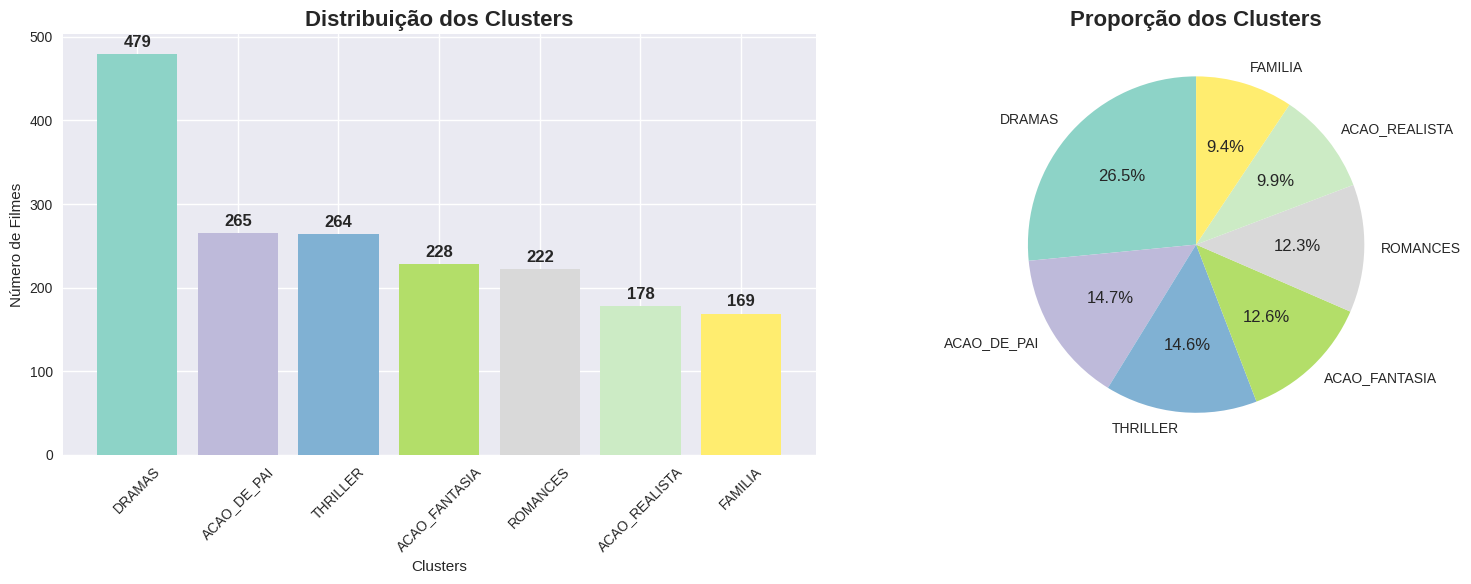


Distribuição detalhada:
DRAMAS: 479 filmes (26.5%)
ACAO_DE_PAI: 265 filmes (14.7%)
THRILLER: 264 filmes (14.6%)
ACAO_FANTASIA: 228 filmes (12.6%)
ROMANCES: 222 filmes (12.3%)
ACAO_REALISTA: 178 filmes (9.9%)
FAMILIA: 169 filmes (9.4%)


In [3]:
# Distribuição dos clusters
cluster_counts = df['cluster'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))
bars = ax1.bar(cluster_counts.index, cluster_counts.values, color=colors)
ax1.set_title('Distribuição dos Clusters', fontsize=16, fontweight='bold')
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Número de Filmes')
ax1.tick_params(axis='x', rotation=45)

# Adicionando valores nas barras
for bar, count in zip(bars, cluster_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(count), ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
ax2.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Proporção dos Clusters', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDistribuição detalhada:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{cluster}: {count} filmes ({percentage:.1f}%)")

## 2. Características dos Clusters por Métricas Principais

In [4]:
# Análise das características principais por cluster
metrics = ['budget', 'revenue', 'profit', 'roi', 'popularity', 'runtime', 'imdb', 'rotten']

# Estatísticas por cluster
cluster_stats = df.groupby('cluster')[metrics].agg(['mean', 'median', 'std']).round(2)

print("Estatísticas por Cluster:")
print("=" * 80)
for metric in metrics:
    print(f"\n{metric.upper()}:")
    print(cluster_stats[metric])
    print("-" * 50)

Estatísticas por Cluster:

BUDGET:
                       mean       median          std
cluster                                              
ACAO_DE_PAI    3.075586e+07   20000000.0  41597936.66
ACAO_FANTASIA  1.103513e+08  101500000.0  87198385.35
ACAO_REALISTA  4.892899e+07   29700000.0  58023420.88
DRAMAS         1.938765e+07   12000000.0  23316241.90
FAMILIA        7.991540e+07   72000000.0  60688158.21
ROMANCES       1.913576e+07   12920373.0  21169833.46
THRILLER       1.328160e+07    8716700.0  15526599.79
--------------------------------------------------

REVENUE:
                       mean       median           std
cluster                                               
ACAO_DE_PAI    7.152415e+07   19754272.0  1.673767e+08
ACAO_FANTASIA  3.493719e+08  184850379.5  4.423999e+08
ACAO_REALISTA  1.146812e+08   37858992.5  2.084485e+08
DRAMAS         4.232936e+07   15000000.0  8.679264e+07
FAMILIA        3.012969e+08  153000000.0  3.713299e+08
ROMANCES       5.686950e+07   164

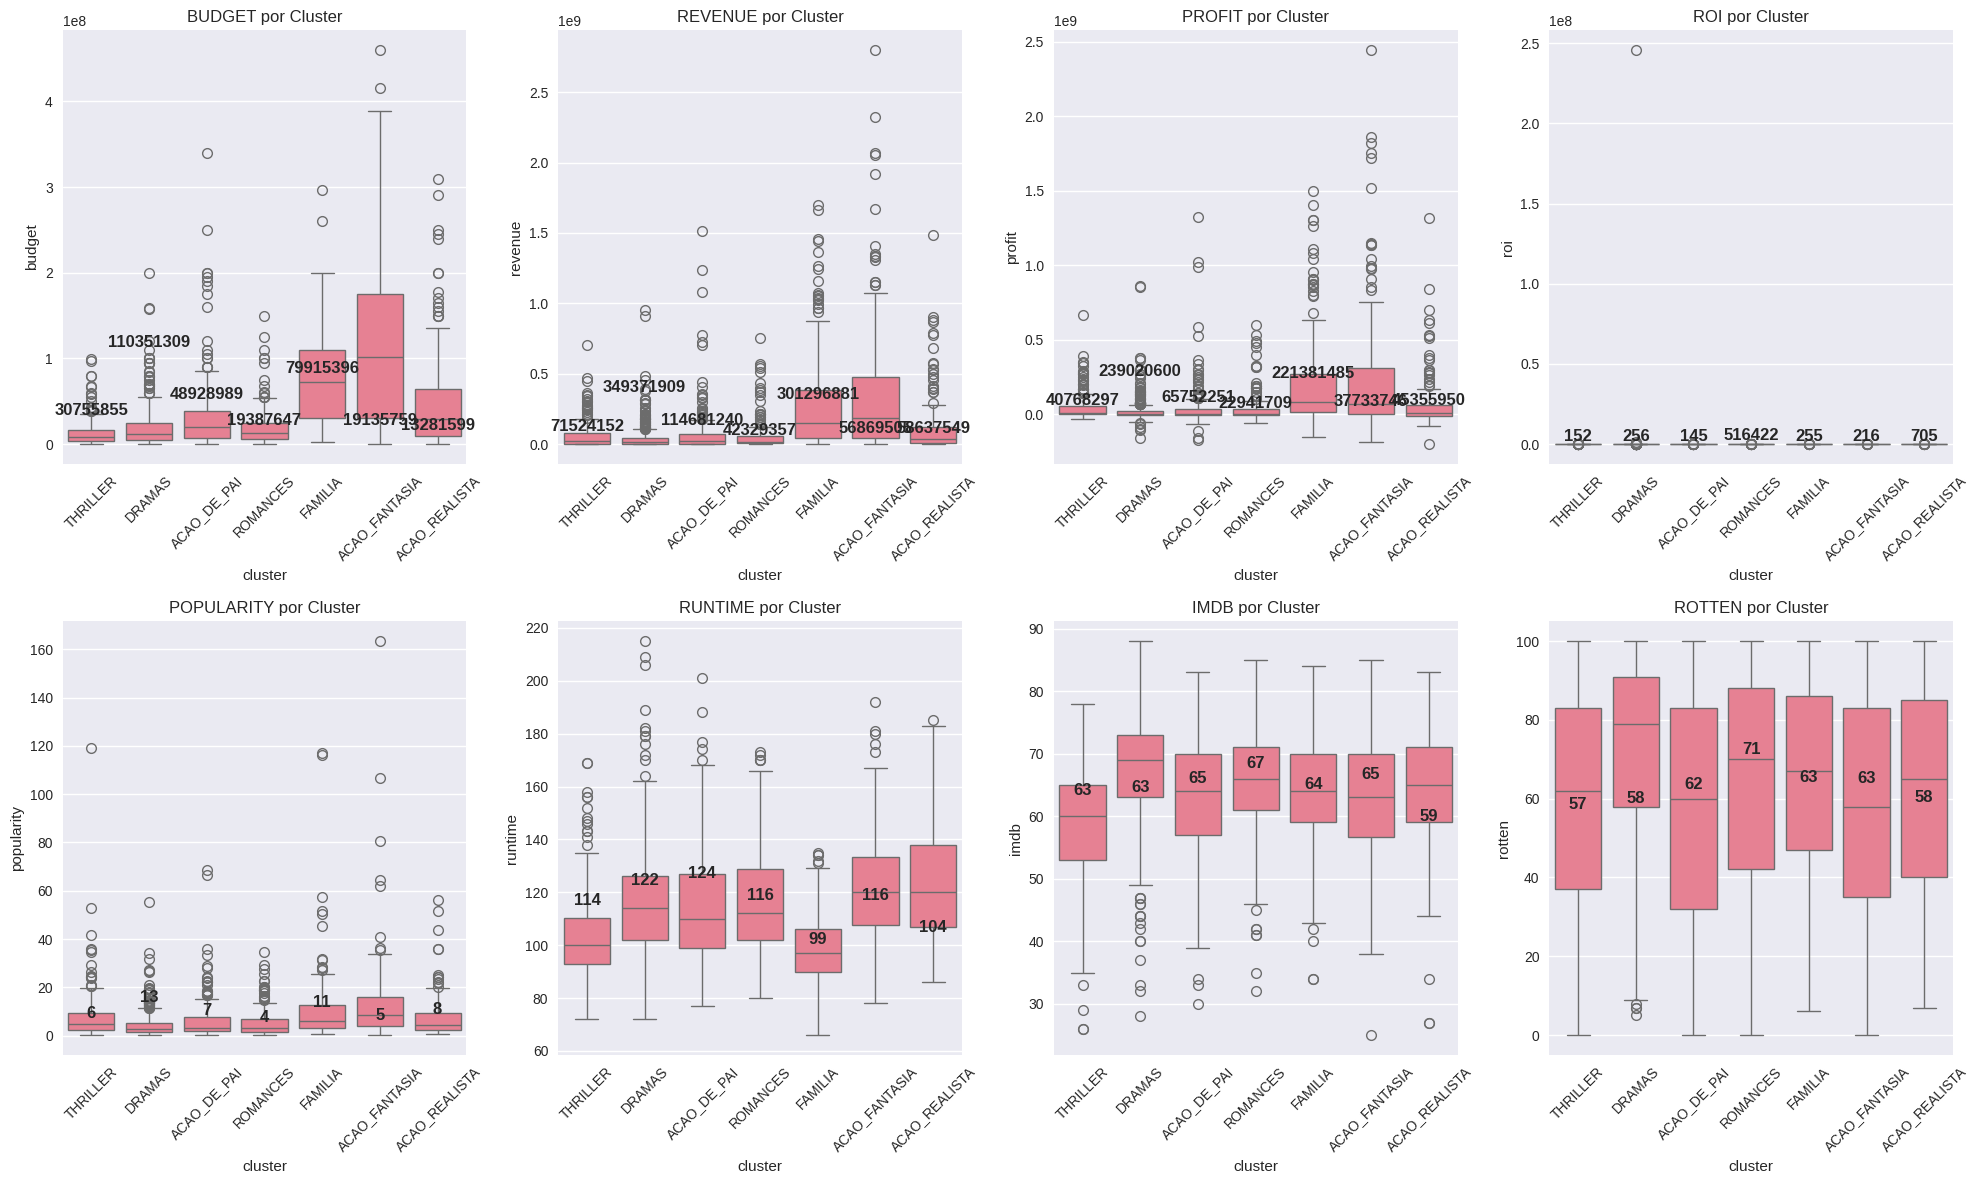

In [5]:
# Visualização das características por cluster
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    # Boxplot
    sns.boxplot(data=df, x='cluster', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric.upper()} por Cluster')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Adicionando médias
    means = df.groupby('cluster')[metric].mean()
    for j, (cluster, mean_val) in enumerate(means.items()):
        axes[i].text(j, mean_val, f'{mean_val:.0f}', 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Análise de Performance Financeira

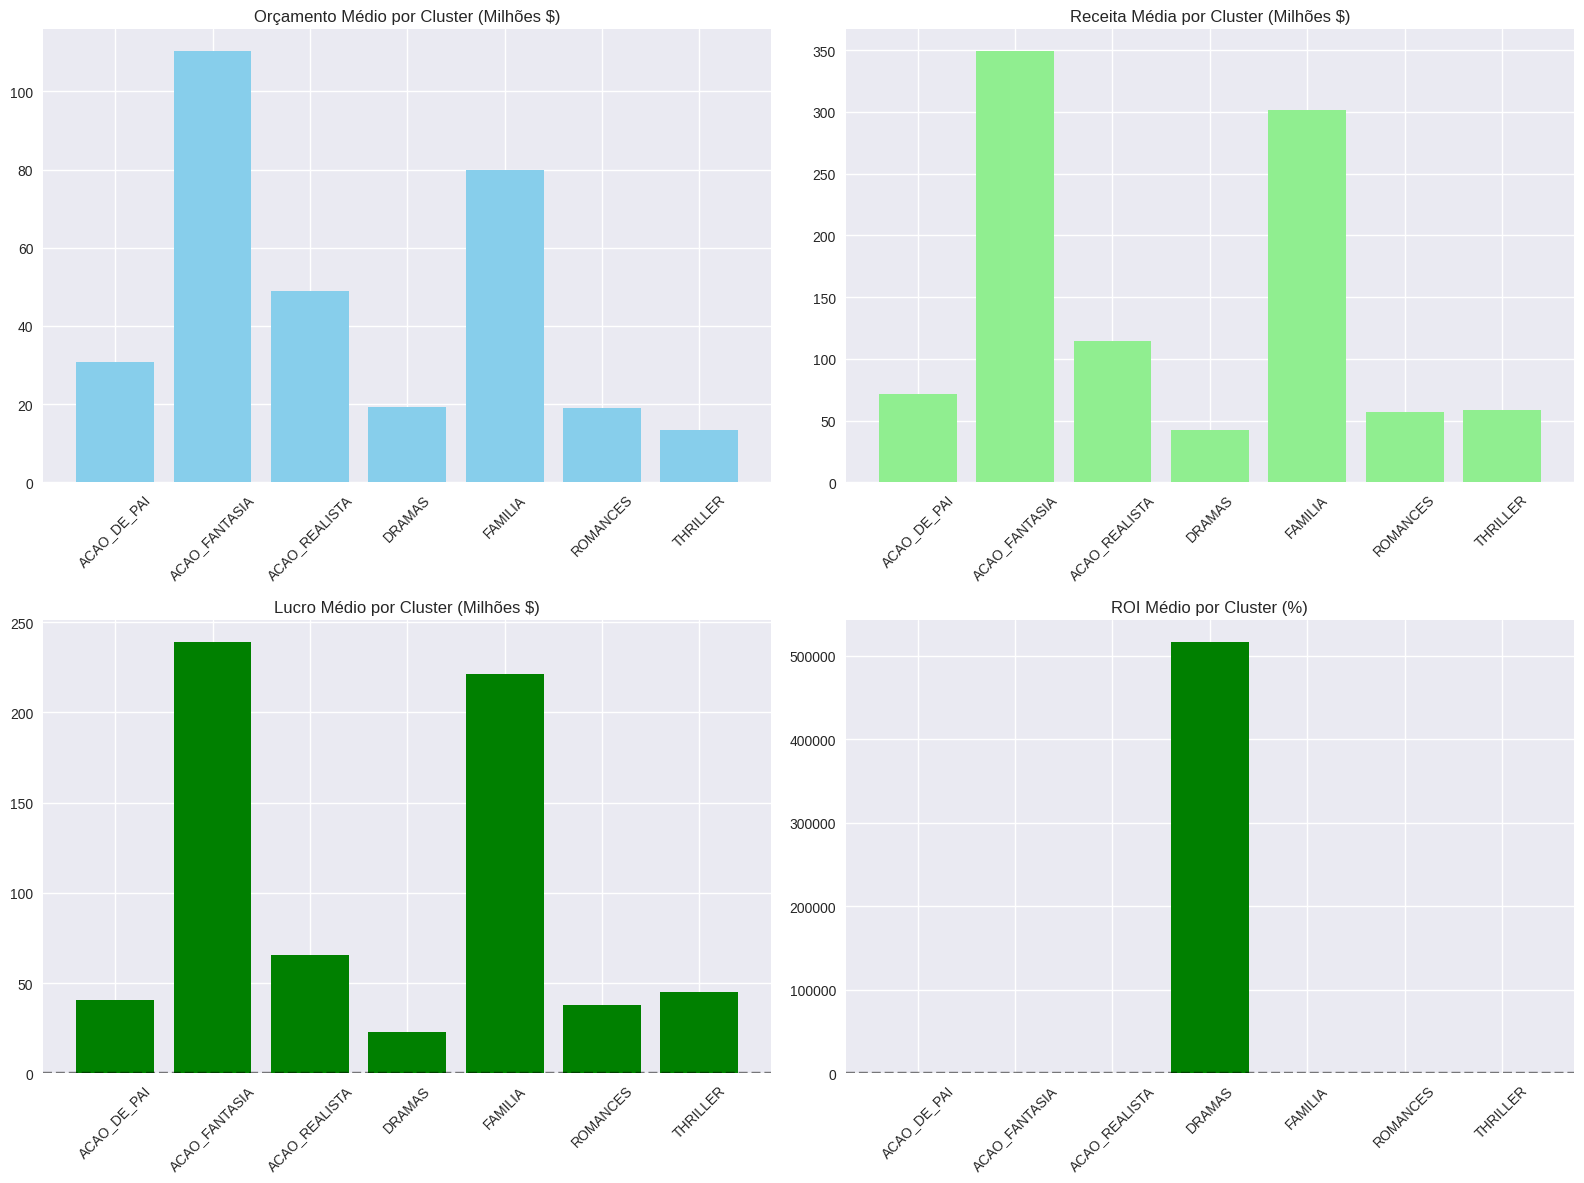


Resumo Financeiro por Cluster:
                     budget                    revenue               \
                       mean       median          mean       median   
cluster                                                               
ACAO_DE_PAI    3.075586e+07   20000000.0  7.152415e+07   19754272.0   
ACAO_FANTASIA  1.103513e+08  101500000.0  3.493719e+08  184850379.5   
ACAO_REALISTA  4.892899e+07   29700000.0  1.146812e+08   37858992.5   
DRAMAS         1.938765e+07   12000000.0  4.232936e+07   15000000.0   
FAMILIA        7.991540e+07   72000000.0  3.012969e+08  153000000.0   
ROMANCES       1.913576e+07   12920373.0  5.686950e+07   16433663.0   
THRILLER       1.328160e+07    8716700.0  5.863755e+07   18698694.5   

                     profit                    roi          
                       mean      median       mean  median  
cluster                                                     
ACAO_DE_PAI    4.076830e+07    800000.0     151.97    8.47  
ACAO_FANTASIA

In [6]:
# Análise financeira por cluster
financial_metrics = ['budget', 'revenue', 'profit', 'roi']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Orçamento médio por cluster
budget_means = df.groupby('cluster')['budget'].mean() / 1e6
axes[0,0].bar(budget_means.index, budget_means.values, color='skyblue')
axes[0,0].set_title('Orçamento Médio por Cluster (Milhões $)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Receita média por cluster
revenue_means = df.groupby('cluster')['revenue'].mean() / 1e6
axes[0,1].bar(revenue_means.index, revenue_means.values, color='lightgreen')
axes[0,1].set_title('Receita Média por Cluster (Milhões $)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Lucro médio por cluster
profit_means = df.groupby('cluster')['profit'].mean() / 1e6
colors = ['red' if x < 0 else 'green' for x in profit_means.values]
axes[1,0].bar(profit_means.index, profit_means.values, color=colors)
axes[1,0].set_title('Lucro Médio por Cluster (Milhões $)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 4. ROI médio por cluster
roi_means = df.groupby('cluster')['roi'].mean()
colors = ['red' if x < 0 else 'green' for x in roi_means.values]
axes[1,1].bar(roi_means.index, roi_means.values, color=colors)
axes[1,1].set_title('ROI Médio por Cluster (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Tabela resumo financeiro
financial_summary = df.groupby('cluster').agg({
    'budget': ['mean', 'median'],
    'revenue': ['mean', 'median'],
    'profit': ['mean', 'median'],
    'roi': ['mean', 'median']
}).round(2)

print("\nResumo Financeiro por Cluster:")
print(financial_summary)

## 4. Análise de Qualidade e Avaliações

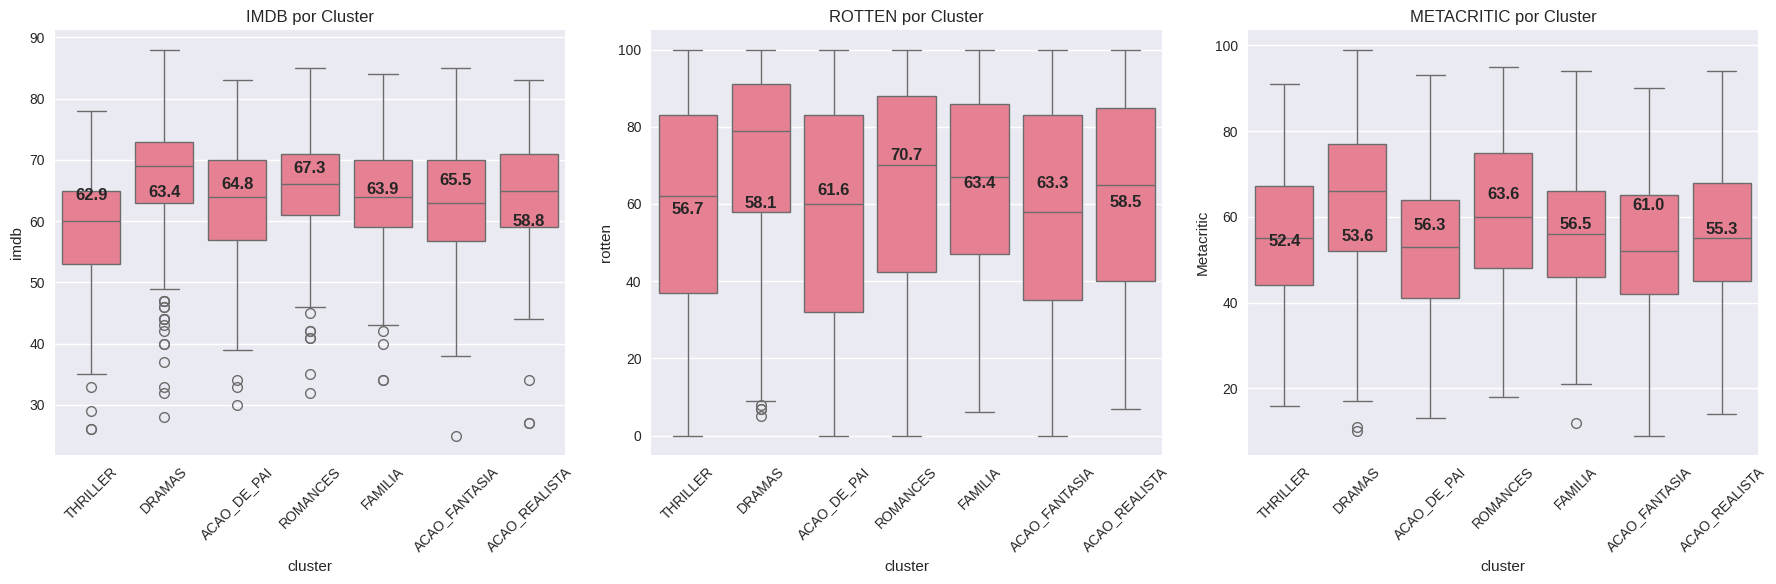

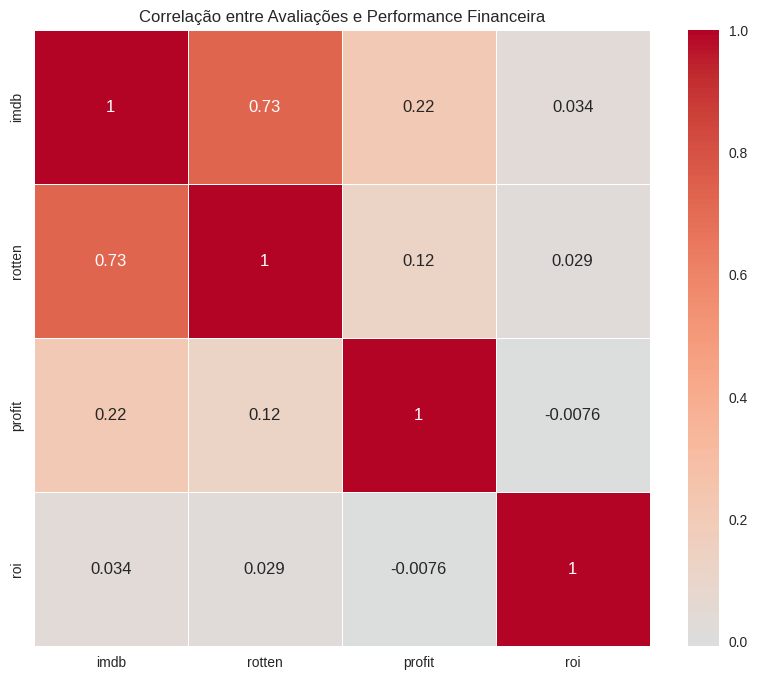

In [7]:
# Análise de qualidade por cluster
quality_metrics = ['imdb', 'rotten', 'Metacritic']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(quality_metrics):
    if metric in df.columns:
        # Boxplot
        sns.boxplot(data=df, x='cluster', y=metric, ax=axes[i])
        axes[i].set_title(f'{metric.upper()} por Cluster')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Adicionando médias
        means = df.groupby('cluster')[metric].mean()
        for j, (cluster, mean_val) in enumerate(means.items()):
            if not pd.isna(mean_val):
                axes[i].text(j, mean_val, f'{mean_val:.1f}', 
                            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Correlação entre avaliações e performance financeira
correlation_metrics = ['imdb', 'rotten', 'profit', 'roi']
correlation_data = df[correlation_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlação entre Avaliações e Performance Financeira')
plt.show()

## 5. Análise Temporal por Cluster

<Figure size 1500x800 with 0 Axes>

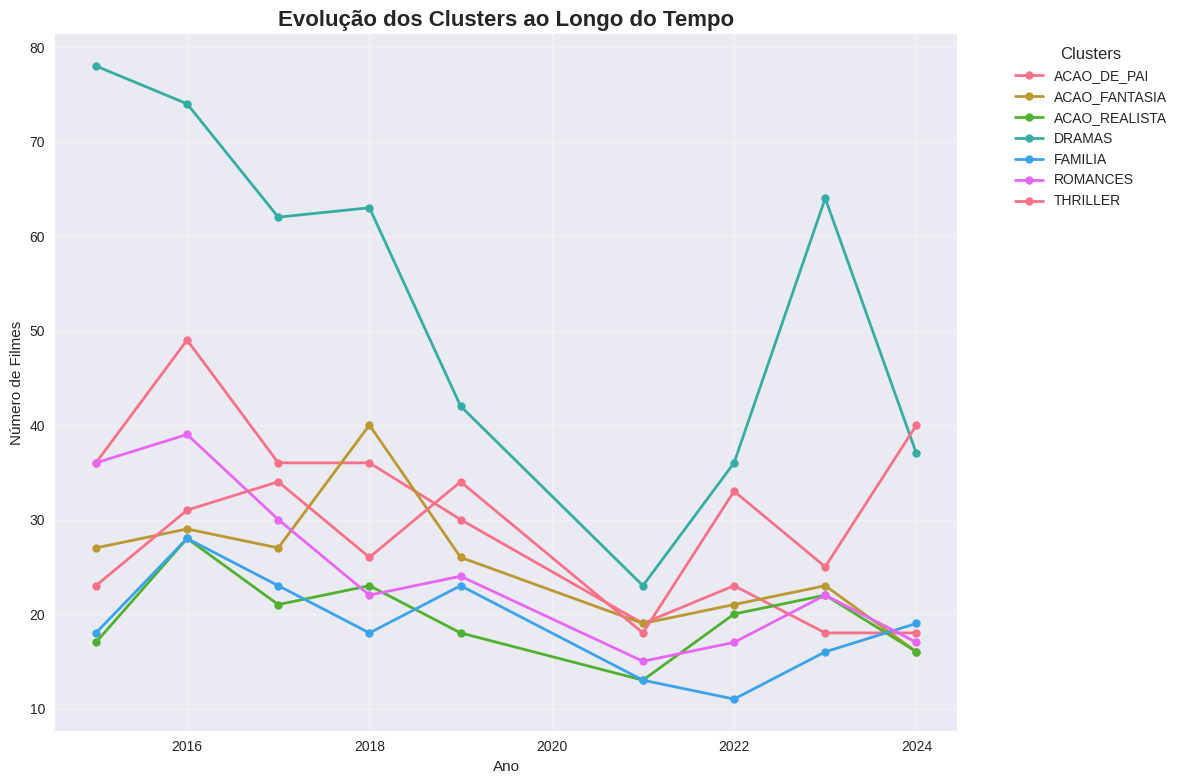

<Figure size 1500x800 with 0 Axes>

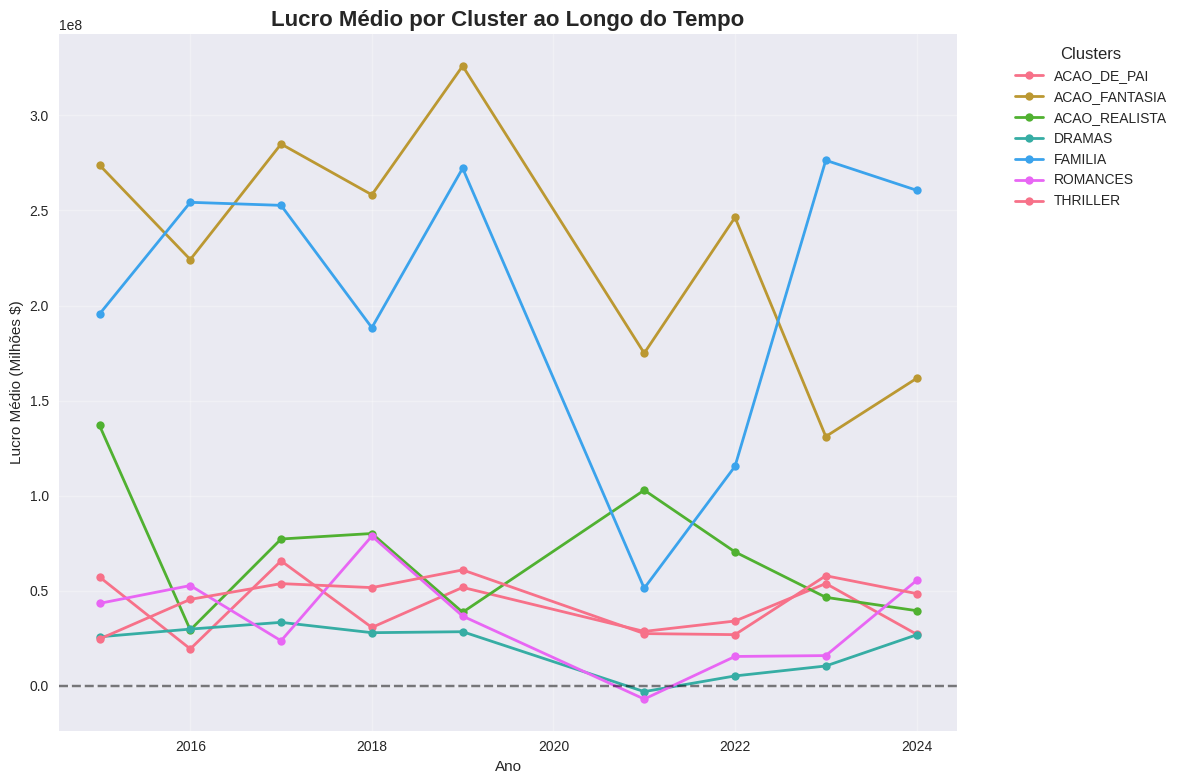

In [8]:
# Análise temporal
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Distribuição por ano
yearly_distribution = df.groupby(['Year', 'cluster']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
yearly_distribution.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Evolução dos Clusters ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Performance financeira por ano
yearly_performance = df.groupby(['Year', 'cluster'])['profit'].mean().unstack()

plt.figure(figsize=(15, 8))
yearly_performance.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Lucro Médio por Cluster ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Lucro Médio (Milhões $)')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 6. Análise de Gêneros por Cluster

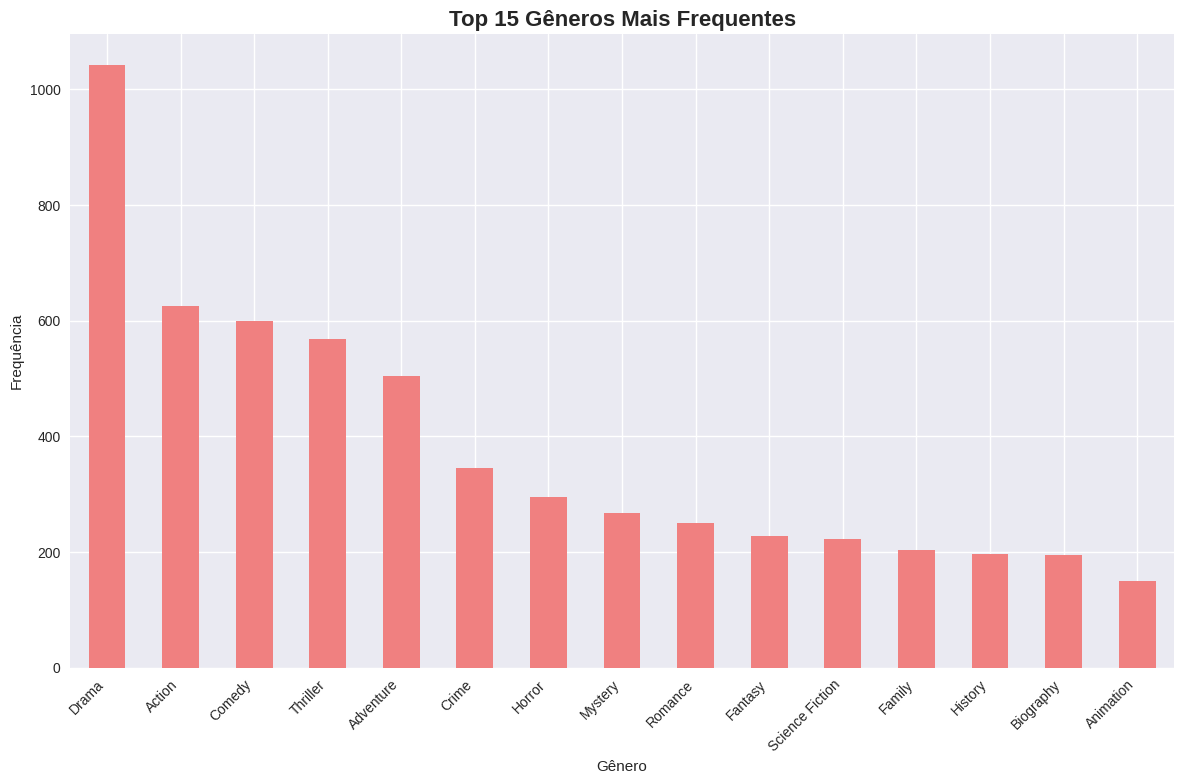


Top 5 Gêneros por Cluster:

THRILLER:
  Horror: 239
  Thriller: 202
  Mystery: 150
  Drama: 91
  Science Fiction: 38

DRAMAS:
  Drama: 437
  Comedy: 195
  Biography: 153
  History: 115
  Crime: 47

ACAO_DE_PAI:
  Crime: 265
  Thriller: 195
  Action: 167
  Drama: 148
  Mystery: 64

ROMANCES:
  Romance: 222
  Drama: 191
  Comedy: 105
  History: 23
  Fantasy: 21

FAMILIA:
  Family: 154
  Adventure: 154
  Comedy: 140
  Animation: 123
  Fantasy: 63

ACAO_FANTASIA:
  Action: 218
  Adventure: 200
  Science Fiction: 144
  Fantasy: 82
  Sci-Fi: 77

ACAO_REALISTA:
  Action: 175
  Drama: 126
  Thriller: 103
  Adventure: 74
  History: 49


In [9]:
# Análise de gêneros por cluster
def extract_genres(genre_str):
    """Extrai gêneros da string"""
    if pd.isna(genre_str):
        return []
    try:
        # Remove colchetes e aspas, divide por vírgula
        genres = genre_str.replace("['", '').replace("']", '').split("', '")
        return [g.strip() for g in genres]
    except:
        return []

# Aplicando a função
df['genres_list'] = df['genres'].apply(extract_genres)

# Criando lista de todos os gêneros
all_genres = []
for genres in df['genres_list']:
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts().head(15)

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 15 Gêneros Mais Frequentes', fontsize=16, fontweight='bold')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análise de gêneros por cluster
cluster_genres = {}
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    cluster_all_genres = []
    for genres in cluster_data['genres_list']:
        cluster_all_genres.extend(genres)
    cluster_genres[cluster] = pd.Series(cluster_all_genres).value_counts().head(5)

print("\nTop 5 Gêneros por Cluster:")
for cluster, genres in cluster_genres.items():
    print(f"\n{cluster}:")
    for genre, count in genres.items():
        print(f"  {genre}: {count}")

## 7. Análise de Sucesso por Cluster

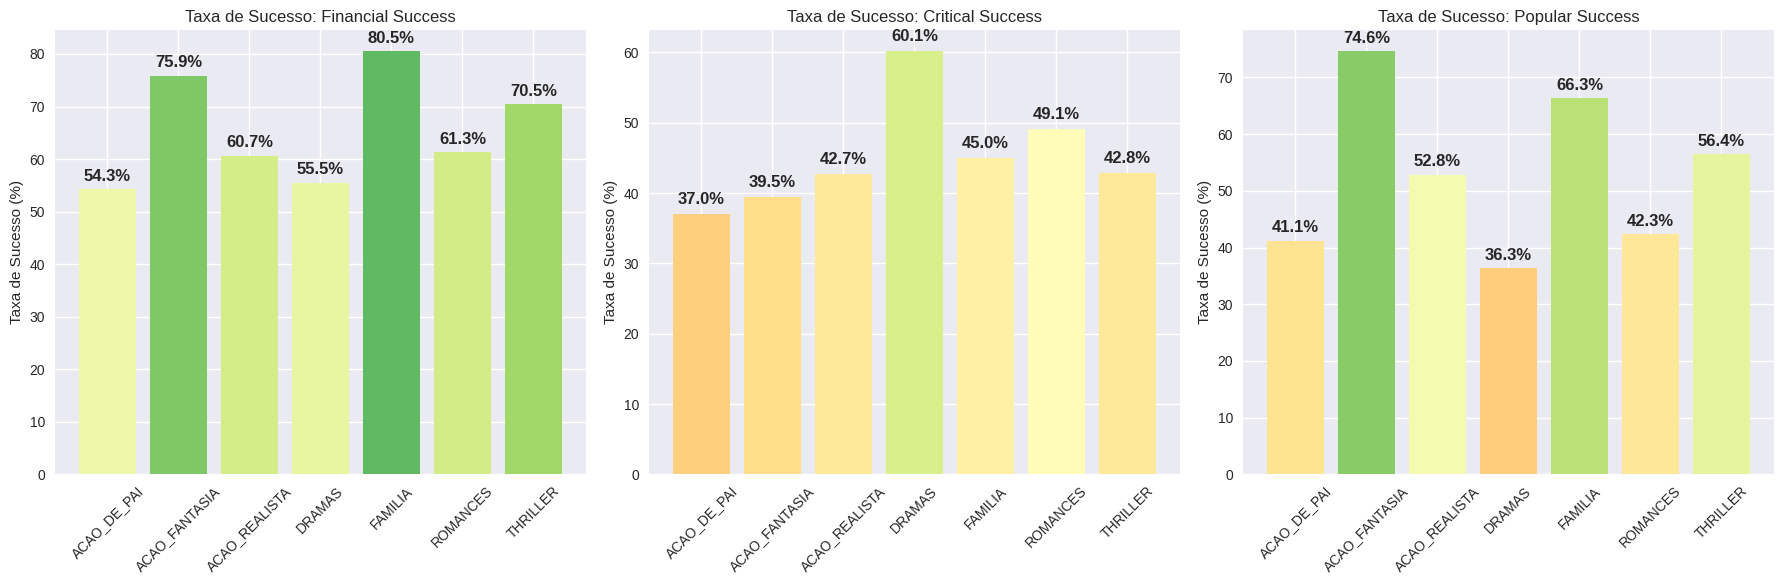


Taxa de Sucesso por Cluster (%):
               financial_success  critical_success  popular_success
cluster                                                            
ACAO_DE_PAI                 54.3              37.0             41.1
ACAO_FANTASIA               75.9              39.5             74.6
ACAO_REALISTA               60.7              42.7             52.8
DRAMAS                      55.5              60.1             36.3
FAMILIA                     80.5              45.0             66.3
ROMANCES                    61.3              49.1             42.3
THRILLER                    70.5              42.8             56.4


In [10]:
# Definindo critérios de sucesso
df['financial_success'] = df['profit'] > 0
df['critical_success'] = (df['imdb'] > 7.0) & (df['rotten'] > 70)
df['popular_success'] = df['popularity'] > df['popularity'].median()

# Análise de sucesso por cluster
success_metrics = ['financial_success', 'critical_success', 'popular_success']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(success_metrics):
    success_rate = df.groupby('cluster')[metric].mean() * 100
    
    colors = plt.cm.RdYlGn(success_rate / 100)
    bars = axes[i].bar(success_rate.index, success_rate.values, color=colors)
    axes[i].set_title(f'Taxa de Sucesso: {metric.replace("_", " ").title()}')
    axes[i].set_ylabel('Taxa de Sucesso (%)')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Adicionando valores nas barras
    for bar, rate in zip(bars, success_rate.values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                     f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela resumo de sucesso
success_summary = df.groupby('cluster').agg({
    'financial_success': 'mean',
    'critical_success': 'mean',
    'popular_success': 'mean'
}).round(3) * 100

print("\nTaxa de Sucesso por Cluster (%):")
print(success_summary)

## 8. Análise de Outliers e Casos Extremos

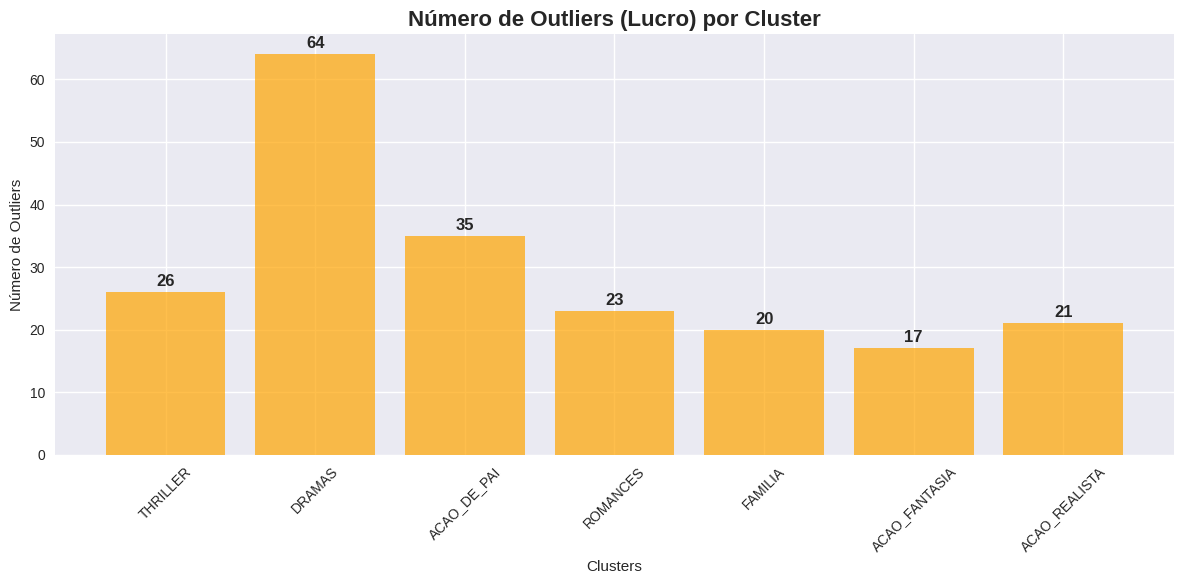


Top 10 Filmes Mais Lucrativos por Cluster:

THRILLER:
                  Title  Year    profit         roi
                     It  2017 668000000 1908.571429
         It Chapter Two  2019 394123154  498.890068
Beetlejuice Beetlejuice  2024 352900435  356.465086
                The Nun  2018 344082797 1564.012714
          A Quiet Place  2018 323955294 1905.619376
    Annabelle: Creation  2017 291592201 1943.948007
        The Conjuring 2  2016 282811702  707.029255
Five Nights at Freddy's  2023 277144130 1385.720650
         Alien: Romulus  2024 270865342  338.581678
                  Split  2016 269454358 2993.937311

DRAMAS:
                           Title  Year    profit         roi
               Bohemian Rhapsody  2018 858813521 1651.564463
                     Oppenheimer  2023 852000000  852.000000
                            Yolo  2024 380600000  380.600000
            The Greatest Showman  2017 375066134  446.507302
    Limonov: The Ballad of Eddie  2024 367023000 3495.45714

In [11]:
# Identificando outliers por cluster
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Análise de outliers para lucro
outlier_analysis = {}
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    outliers = find_outliers(cluster_data, 'profit')
    outlier_analysis[cluster] = len(outliers)

plt.figure(figsize=(12, 6))
clusters = list(outlier_analysis.keys())
outlier_counts = list(outlier_analysis.values())

bars = plt.bar(clusters, outlier_counts, color='orange', alpha=0.7)
plt.title('Número de Outliers (Lucro) por Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Clusters')
plt.ylabel('Número de Outliers')
plt.xticks(rotation=45)

# Adicionando valores nas barras
for bar, count in zip(bars, outlier_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Top 10 filmes mais lucrativos por cluster
print("\nTop 10 Filmes Mais Lucrativos por Cluster:")
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster].copy()
    top_profitable = cluster_data.nlargest(10, 'profit')[['Title', 'Year', 'profit', 'roi']]
    
    print(f"\n{cluster}:")
    print(top_profitable.to_string(index=False))

## 9. Análise de Correlações e Padrões

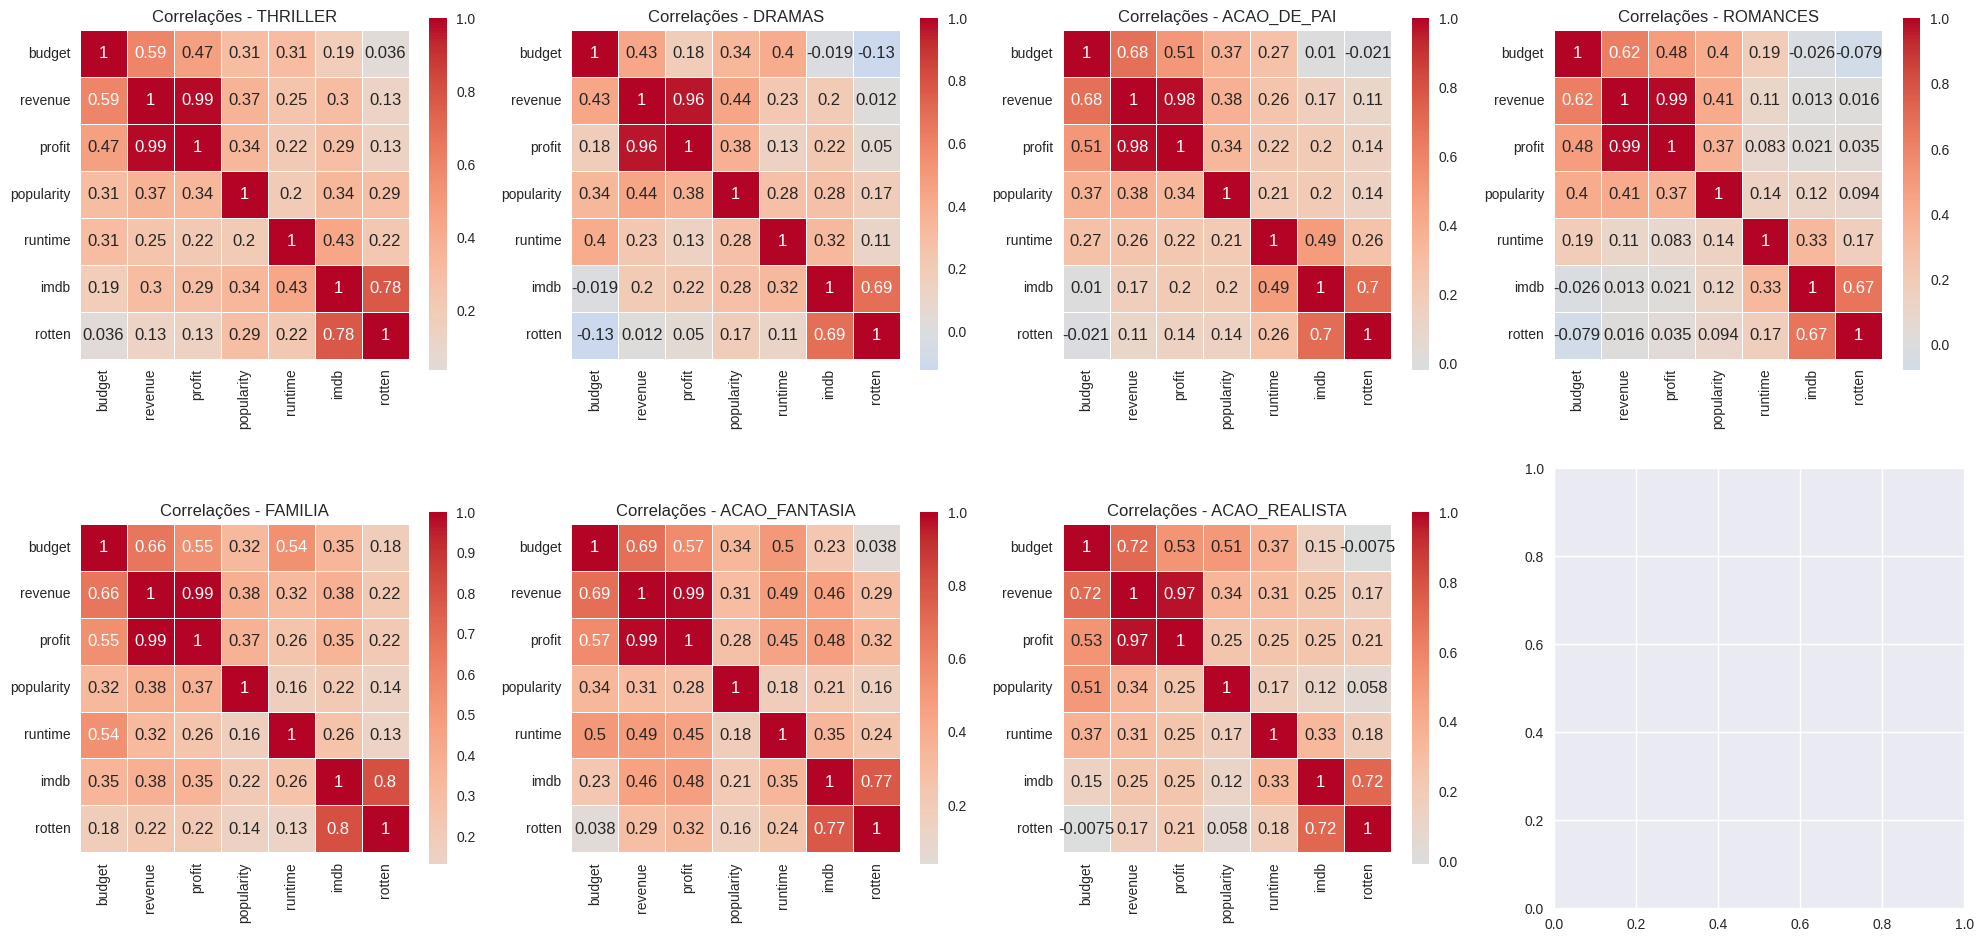

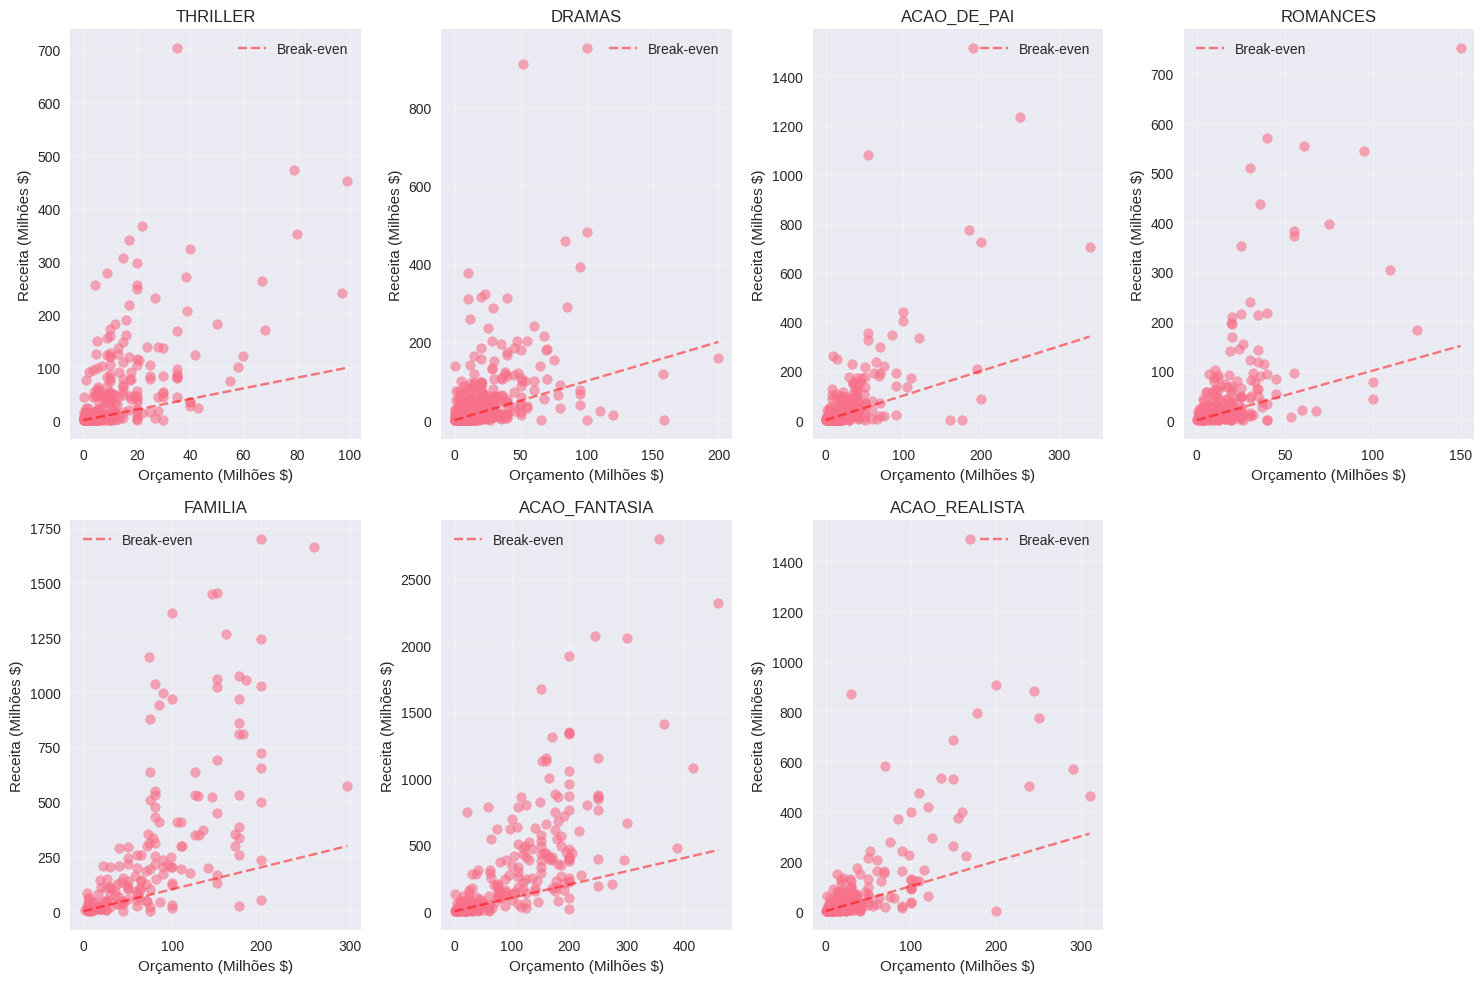

In [12]:
# Matriz de correlação para cada cluster
correlation_columns = ['budget', 'revenue', 'profit', 'popularity', 'runtime', 'imdb', 'rotten']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, cluster in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster][correlation_columns].corr()
    
    sns.heatmap(cluster_data, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, ax=axes[i], cbar_kws={'shrink': 0.8})
    axes[i].set_title(f'Correlações - {cluster}')

plt.tight_layout()
plt.show()

# Análise de dispersão: Orçamento vs Receita por cluster
plt.figure(figsize=(15, 10))
for i, cluster in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    plt.subplot(2, 4, i+1)
    plt.scatter(cluster_data['budget']/1e6, cluster_data['revenue']/1e6, alpha=0.6)
    plt.xlabel('Orçamento (Milhões $)')
    plt.ylabel('Receita (Milhões $)')
    plt.title(f'{cluster}')
    plt.grid(True, alpha=0.3)
    
    # Linha de break-even
    max_budget = cluster_data['budget'].max() / 1e6
    plt.plot([0, max_budget], [0, max_budget], 'r--', alpha=0.5, label='Break-even')
    plt.legend()

plt.tight_layout()
plt.show()

## 10. Insights e Recomendações

In [13]:
# Resumo executivo
print("=" * 80)
print("RESUMO EXECUTIVO - ANÁLISE DOS CLUSTERS DE FILMES")
print("=" * 80)

# 1. Clusters mais lucrativos
most_profitable = df.groupby('cluster')['profit'].mean().sort_values(ascending=False)
print(f"\n1. CLUSTERS MAIS LUCRATIVOS (Lucro Médio):")
for cluster, profit in most_profitable.items():
    print(f"   {cluster}: ${profit/1e6:.1f}M")

# 2. Clusters com melhor ROI
best_roi = df.groupby('cluster')['roi'].mean().sort_values(ascending=False)
print(f"\n2. CLUSTERS COM MELHOR ROI:")
for cluster, roi in best_roi.items():
    print(f"   {cluster}: {roi:.1f}%")

# 3. Clusters com melhores avaliações
best_ratings = df.groupby('cluster')['imdb'].mean().sort_values(ascending=False)
print(f"\n3. CLUSTERS COM MELHORES AVALIAÇÕES (IMDB):")
for cluster, rating in best_ratings.items():
    print(f"   {cluster}: {rating:.1f}/10")

# 4. Clusters com maior taxa de sucesso financeiro
success_rate = df.groupby('cluster')['financial_success'].mean().sort_values(ascending=False)
print(f"\n4. TAXA DE SUCESSO FINANCEIRO:")
for cluster, rate in success_rate.items():
    print(f"   {cluster}: {rate*100:.1f}%")

# 5. Análise de risco
risk_analysis = df.groupby('cluster').agg({
    'profit': ['mean', 'std'],
    'roi': ['mean', 'std']
}).round(2)

print(f"\n5. ANÁLISE DE RISCO (Média ± Desvio Padrão):")
for cluster in df['cluster'].unique():
    profit_mean = risk_analysis.loc[cluster, ('profit', 'mean')] / 1e6
    profit_std = risk_analysis.loc[cluster, ('profit', 'std')] / 1e6
    roi_mean = risk_analysis.loc[cluster, ('roi', 'mean')]
    roi_std = risk_analysis.loc[cluster, ('roi', 'std')]
    
    print(f"   {cluster}: Lucro ${profit_mean:.1f}M ± ${profit_std:.1f}M, ROI {roi_mean:.1f}% ± {roi_std:.1f}%")

print("\n" + "=" * 80)
print("RECOMENDAÇÕES ESTRATÉGICAS:")
print("=" * 80)

# Recomendações baseadas na análise
recommendations = {
    'ACAO_DE_PAI': 'Alto risco, alto retorno. Investir em filmes com orçamento moderado e foco em qualidade.',
    'ACAO_FANTASIA': 'Bom potencial de lucro. Priorizar efeitos especiais e narrativas envolventes.',
    'ACAO_REALISTA': 'Estável e previsível. Bom para investimentos conservadores.',
    'DRAMAS': 'Maior volume, variabilidade média. Focar em roteiros de qualidade e direção artística.',
    'FAMILIA': 'Baixo risco, retorno consistente. Ideal para investimentos de longo prazo.',
    'ROMANCES': 'Mercado nicho estável. Investir em elencos atrativos e marketing direcionado.',
    'THRILLER': 'Alta competição, mas bom potencial. Focar em originalidade e tensão narrativa.'
}

for cluster, recommendation in recommendations.items():
    print(f"\n{cluster}: {recommendation}")

print("\n" + "=" * 80)

RESUMO EXECUTIVO - ANÁLISE DOS CLUSTERS DE FILMES

1. CLUSTERS MAIS LUCRATIVOS (Lucro Médio):
   ACAO_FANTASIA: $239.0M
   FAMILIA: $221.4M
   ACAO_REALISTA: $65.8M
   THRILLER: $45.4M
   ACAO_DE_PAI: $40.8M
   ROMANCES: $37.7M
   DRAMAS: $22.9M

2. CLUSTERS COM MELHOR ROI:
   DRAMAS: 516422.2%
   THRILLER: 705.2%
   ACAO_FANTASIA: 255.8%
   FAMILIA: 254.8%
   ROMANCES: 216.0%
   ACAO_DE_PAI: 152.0%
   ACAO_REALISTA: 145.3%

3. CLUSTERS COM MELHORES AVALIAÇÕES (IMDB):
   DRAMAS: 67.3/10
   ROMANCES: 65.5/10
   ACAO_REALISTA: 64.8/10
   FAMILIA: 63.9/10
   ACAO_FANTASIA: 63.4/10
   ACAO_DE_PAI: 62.9/10
   THRILLER: 58.8/10

4. TAXA DE SUCESSO FINANCEIRO:
   FAMILIA: 80.5%
   ACAO_FANTASIA: 75.9%
   THRILLER: 70.5%
   ROMANCES: 61.3%
   ACAO_REALISTA: 60.7%
   DRAMAS: 55.5%
   ACAO_DE_PAI: 54.3%

5. ANÁLISE DE RISCO (Média ± Desvio Padrão):
   THRILLER: Lucro $45.4M ± $82.6M, ROI 705.2% ± 2926.4%
   DRAMAS: Lucro $22.9M ± $79.6M, ROI 516422.2% ± 11225258.0%
   ACAO_DE_PAI: Lucro $40.8M ±